# Лабораторная работа №9
***
Постановка задачи: решить задачу **классификации** на основе набора изображений и методов компьютероного зрения

**Загрузка набора данных**

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import mahotas as mh
from glob import glob
import pandas as pd

df = pd.DataFrame(columns=["img", "features", "label"])

labels = {"cat":0, "dog":1}
path = "data/images/"
images = glob(f"{path}*/*.jpg")
for imgfile in images:
    img = mh.imread(imgfile)
    df.loc[len(df.index)] = [
        imgfile.replace(path, ""),
        img,
        labels[imgfile[12:15]]
    ]
df

,img,features,label
0,data/images\cat\0.jpg,"[[[203, 164, 87], [203, 164, 87], [204, 165, 8...",0
1,data/images\cat\1000.jpg,"[[[133, 107, 70], [137, 109, 70], [143, 114, 7...",0
2,data/images\cat\10000.jpg,"[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",0
3,data/images\cat\10001.jpg,"[[[145, 122, 70], [144, 121, 69], [144, 121, 6...",0
4,data/images\cat\10002.jpg,"[[[63, 65, 62], [62, 64, 61], [61, 63, 60], [6...",0
...,...,...,...
195,data/images\dog\10085.jpg,"[[[165, 168, 173], [166, 169, 174], [166, 169,...",1
196,data/images\dog\10086.jpg,"[[[218, 192, 167], [215, 189, 164], [211, 185,...",1
197,data/images\dog\10087.jpg,"[[[116, 121, 114], [127, 132, 125], [117, 122,...",1
198,data/images\dog\10088.jpg,"[[[158, 157, 139], [157, 156, 138], [156, 155,...",1


**Предобработка данных**

Фильтрация/восстановление

In [3]:
""" Median Filter """
df["feat_medianf"] = df["features"].apply(
    lambda row: mh.median_filter(row.max(2))
)

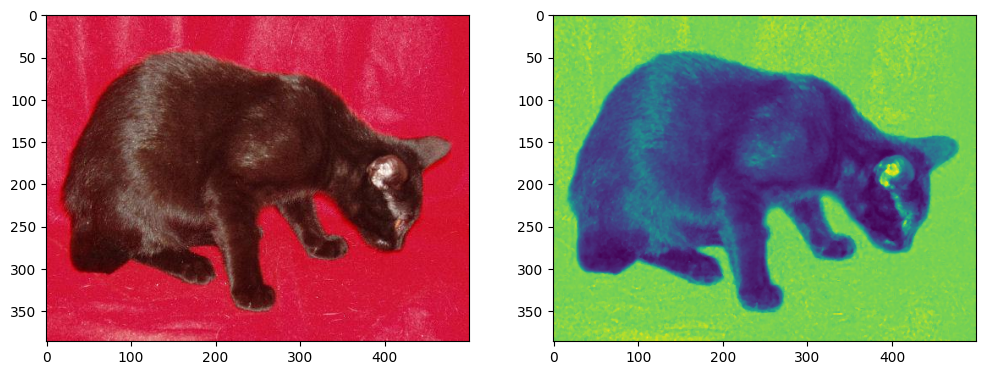

In [4]:
fix, axes = plt.subplots(1,2, figsize=(12, 8))
axes[0].imshow(df["features"].loc[13])
axes[1].imshow(df["feat_medianf"].loc[13])
plt.show()

In [5]:
""" Mean Filter """
df["feat_meanf"] = df["features"].apply(
    lambda row: mh.mean_filter(row.max(2), 9)
)

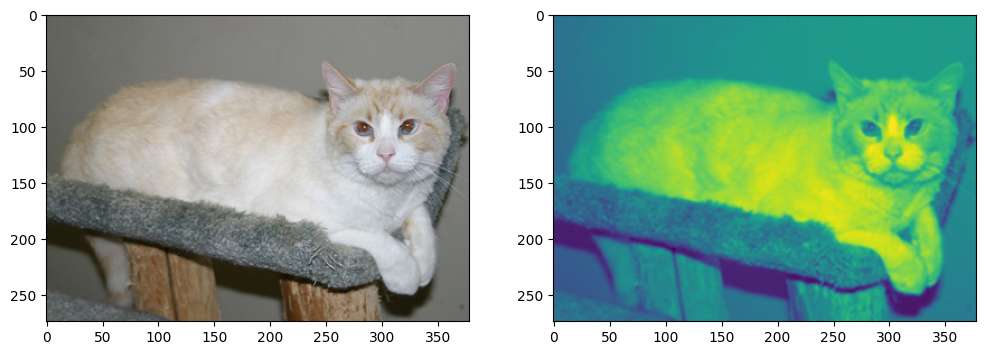

In [6]:
fix, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(df["features"].loc[50])
axes[1].imshow(df["feat_meanf"].loc[50])
plt.show()

In [7]:
""" Rank Filter """
df["feat_rankf"] = df["features"].apply(
    lambda row: mh.rank_filter(row.max(2), 3, 2)
)

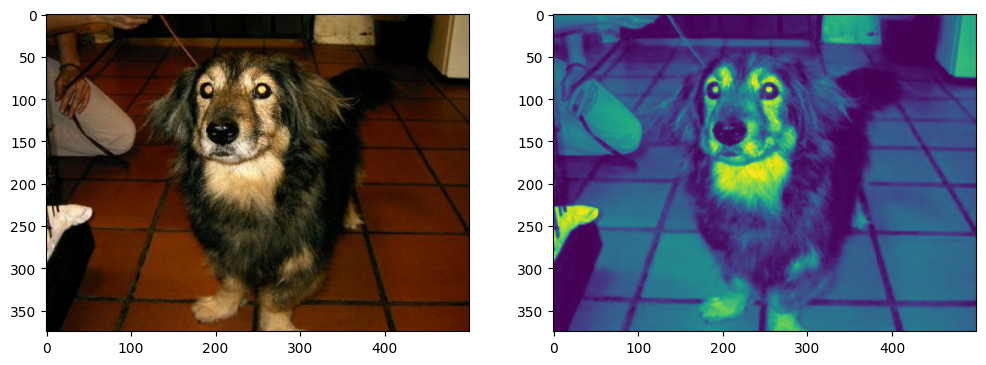

In [8]:
fix, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(df["features"].loc[164])
axes[1].imshow(df["feat_rankf"].loc[164])
plt.show()

In [9]:
"""Gaussian Filter"""
df["feat_gausf"] = df["features"].apply(lambda row: mh.gaussian_filter(row, 2).astype("uint8")[:,:,0])  # type: ignore

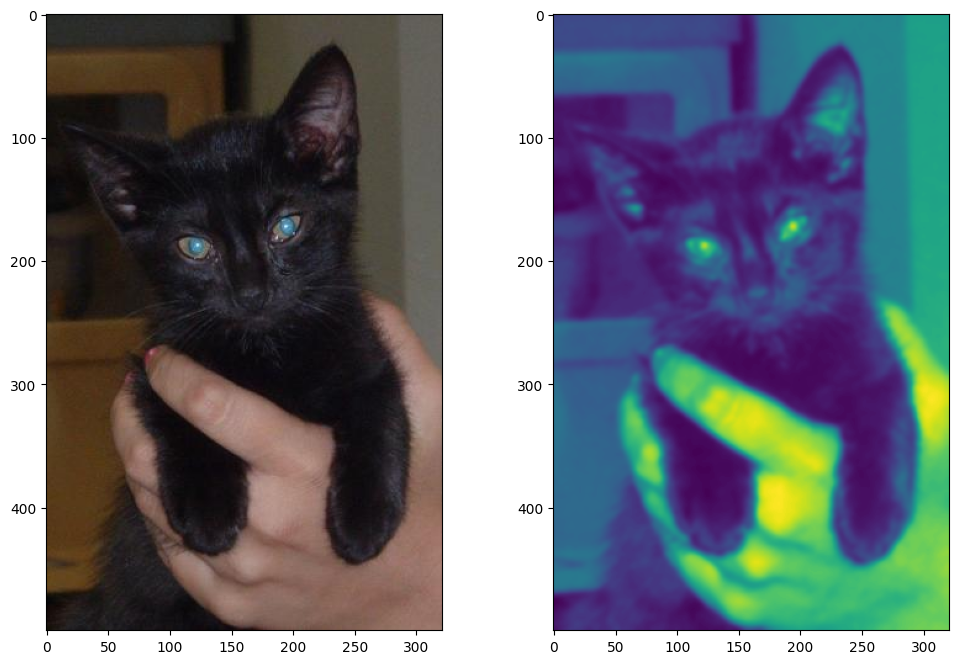

In [10]:
fix, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(df["features"].loc[76])
axes[1].imshow(df["feat_gausf"].loc[76])
plt.show()

In [11]:
""" Borders """
def make_borders(label_img):
    lable, objects = mh.label((label_img > label_img.mean()))
    sizes = mh.labeled.labeled_size(lable)
    obj_to_remove = np.where(sizes < 1000)
    img_without_obj = mh.labeled.remove_regions(lable, obj_to_remove)
    border_img = mh.labeled.borders(img_without_obj)
    return border_img

df["label_rankf"] = df["feat_rankf"].apply(
    lambda row: make_borders(row)
)
df["label_meanf"] = df["feat_meanf"].apply(
    lambda row: make_borders(row)
)
df["label_medianf"] = df["feat_medianf"].apply(
    lambda row: make_borders(row)
)
df["label_gausf"] = df["feat_gausf"].apply(
    lambda row: make_borders(row)
)

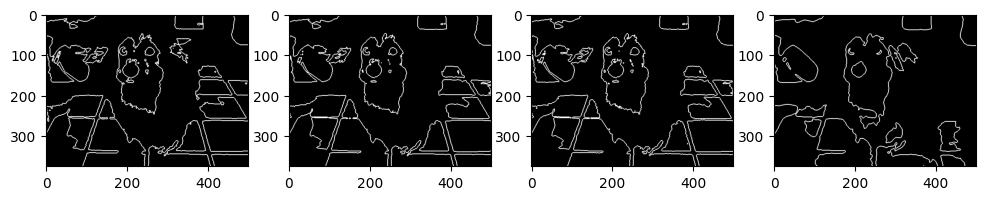

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(12, 8))
axes[0].imshow(df["label_rankf"].loc[164], cmap="gray")
axes[1].imshow(df["label_meanf"].loc[164], cmap="gray")
axes[2].imshow(df["label_medianf"].loc[164], cmap="gray")
axes[3].imshow(df["label_gausf"].loc[164], cmap="gray")

Улучшение

In [13]:
""" Выделение масок """
def make_mask(imgf):
    tresh = mh.thresholding.otsu(imgf)
    return (imgf > tresh).astype(int)

df["feat_rankf_mask"] = df["feat_rankf"].apply(lambda row: make_mask(row))
df["feat_medianf_mask"] = df["feat_medianf"].apply(lambda row: make_mask(row))
df["feat_gausf_mask"] = df["feat_gausf"].apply(lambda row: make_mask(row))
df["feat_meanf_mask"] = df["feat_meanf"].apply(lambda row: make_mask(row.astype('uint8')))
df["label_rankf_mask"] = df["label_rankf"].apply(lambda row: make_mask(row))
df["label_meanf_mask"] = df["label_meanf"].apply(lambda row: make_mask(row))
df["label_medianf_mask"] = df["label_medianf"].apply(lambda row: make_mask(row))
df["label_gausf_mask"] = df["label_gausf"].apply(lambda row: make_mask(row))

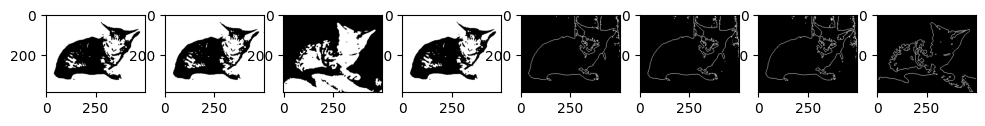

In [14]:
fig, axes = plt.subplots(1, 8, figsize=(12, 9))
axes[0].imshow(df["feat_rankf_mask"].loc[39], cmap="gray")
axes[1].imshow(df["feat_medianf_mask"].loc[39], cmap="gray")
axes[2].imshow(df["feat_gausf_mask"].loc[39], cmap="gray")
axes[3].imshow(df["feat_meanf_mask"].loc[39], cmap="gray")
axes[4].imshow(df["label_rankf_mask"].loc[39], cmap="gray")
axes[5].imshow(df["label_meanf_mask"].loc[39], cmap="gray")
axes[6].imshow(df["label_medianf_mask"].loc[39], cmap="gray")
axes[7].imshow(df["label_gausf_mask"].loc[39], cmap="gray")
plt.show()

In [15]:
df["features"] = df["features"].apply(
    lambda row: mh.colors.rgb2grey(row)
)

<function matplotlib.pyplot.show(close=None, block=None)>

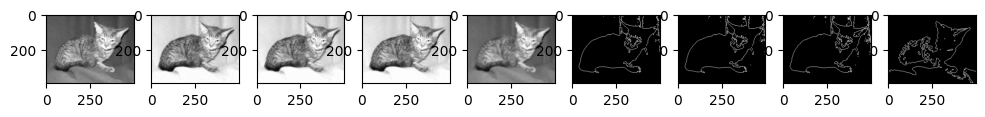

In [16]:
fig, axes = plt.subplots(1, 9, figsize=(12, 8))
axes[0].imshow(df["features"].loc[39], cmap="gray")
axes[1].imshow(df["feat_rankf"].loc[39], cmap="gray")
axes[2].imshow(df["feat_meanf"].loc[39], cmap="gray")
axes[3].imshow(df["feat_medianf"].loc[39], cmap="gray")
axes[4].imshow(df["feat_gausf"].loc[39], cmap="gray")
axes[5].imshow(df["label_rankf"].loc[39], cmap="gray")
axes[6].imshow(df["label_meanf"].loc[39], cmap="gray")
axes[7].imshow(df["label_medianf"].loc[39], cmap="gray")
axes[8].imshow(df["label_gausf"].loc[39], cmap="gray")
plt.show

In [17]:
""" Выраванивание гистограмм (нормализация) """
from mahotas.features import surf
df["sfeatures"] = df["features"].apply(lambda row: surf.dense(row, 12))
df["sfeat_rankf"] = df["feat_rankf"].apply(lambda row: surf.dense(row, 12))
df["sfeat_meanf"] = df["feat_meanf"].apply(lambda row: surf.dense(row, 12))
df["sfeat_medianf"] = df["feat_medianf"].apply(lambda row: surf.dense(row, 12))
df["sfeat_gausf"] = df["feat_gausf"].apply(lambda row: surf.dense(row, 12))
df["slabel_rankf"] = df["label_rankf"].apply(lambda row: surf.dense(row, 12))
df["slabel_meanf"] = df["label_meanf"].apply(lambda row: surf.dense(row, 12))
df["slabel_medianf"] = df["label_medianf"].apply(lambda row: surf.dense(row, 12))
df["slabel_gausf"] = df["label_gausf"].apply(lambda row: surf.dense(row, 12))

c:\Users\Ilfe\MaiProject\mai-digital-image-processing\.venv\Lib\site-packages\mahotas\features\surf.py:46: SyntaxWarning: invalid escape sequence '\ '
  '''


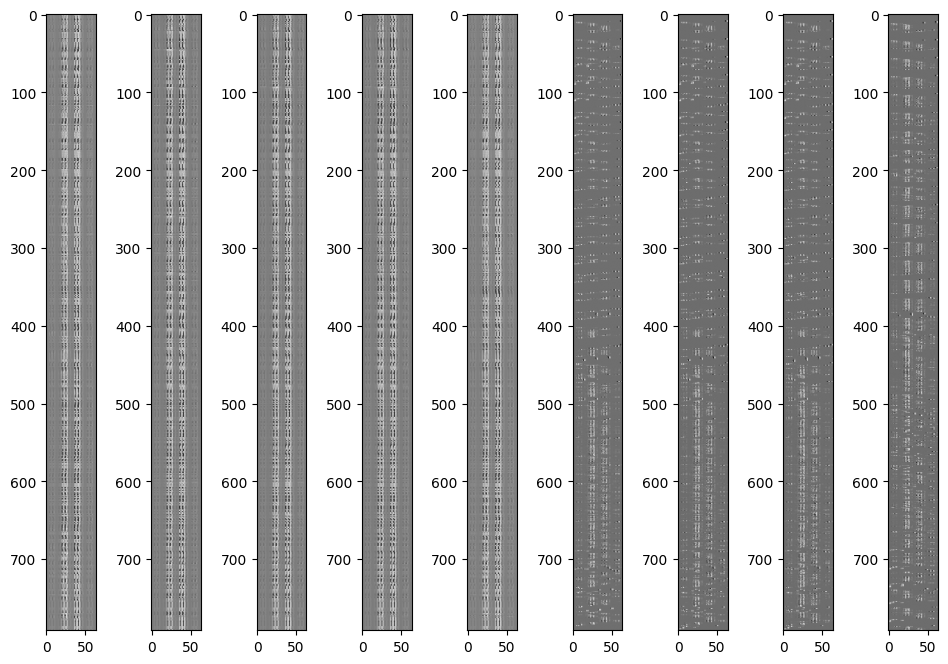

In [18]:
fig, axes = plt.subplots(1, 9, figsize=(12, 8))
axes[0].imshow(df["sfeatures"].loc[39], cmap="gray")
axes[1].imshow(df["sfeat_rankf"].loc[39], cmap="gray")
axes[2].imshow(df["sfeat_meanf"].loc[39], cmap="gray")
axes[3].imshow(df["sfeat_medianf"].loc[39], cmap="gray")
axes[4].imshow(df["sfeat_gausf"].loc[39], cmap="gray")
axes[5].imshow(df["slabel_rankf"].loc[39], cmap="gray")
axes[6].imshow(df["slabel_meanf"].loc[39], cmap="gray")
axes[7].imshow(df["slabel_medianf"].loc[39], cmap="gray")
axes[8].imshow(df["slabel_gausf"].loc[39], cmap="gray")
plt.show()

In [19]:
"""
featconcat_left = []
for index, row in df.iterrows():
    feature = np.concatenate([
        np.mean(row["feat_rankf"], axis=0),       
        np.mean(row["feat_meanf"], axis=0),       
        np.mean(row["feat_medianf"], axis=0),       
        np.mean(row["feat_gausf"], axis=0),
        #np.mean(row["feat_rankf_mask"], axis=0),  
        #np.mean(row["feat_meanf_mask"], axis=0),  
        #np.mean(row["feat_medianf_mask"], axis=0),  
        #np.mean(row["feat_gausf_mask"], axis=0),
        #np.mean(row["label_rankf_mask"], axis=0), 
        #np.mean(row["label_meanf_mask"], axis=0), 
        #np.mean(row["label_medianf_mask"], axis=0), 
        #np.mean(row["label_gausf_mask"], axis=0)
    ])
    featconcat_left.append(feature)   
"""  
featconcat_right = []
for index, row in df.iterrows():
    feature = np.concatenate([
        #np.mean(row["sfeat_rankf"], axis=0),      
        #np.mean(row["sfeat_meanf"], axis=0),
        #np.mean(row["sfeat_medianf"], axis=0),      
        #np.mean(row["sfeat_gausf"], axis=0),
        np.mean(row["slabel_rankf"], axis=0),
        np.mean(row["slabel_meanf"], axis=0),
        np.mean(row["slabel_medianf"], axis=0), 
        np.mean(row["slabel_gausf"], axis=0), 
        np.mean(row["sfeatures"], axis=0)
    ])
    featconcat_right.append(feature)

df["featconcat"] = featconcat_right

In [20]:
df

,img,features,label,feat_medianf,feat_meanf,feat_rankf,feat_gausf,label_rankf,label_meanf,label_medianf,...,sfeatures,sfeat_rankf,sfeat_meanf,sfeat_medianf,sfeat_gausf,slabel_rankf,slabel_meanf,slabel_medianf,slabel_gausf,featconcat
0,data/images\cat\0.jpg,"[[167.23, 167.23, 168.23, 169.23, 171.22999999...",0,"[[203, 203, 204, 205, 207, 208, 209, 209, 210,...","[[203.0, 203.33333333333334, 204.0, 205.333333...","[[203, 203, 203, 204, 205, 207, 208, 209, 209,...","[[158, 158, 159, 160, 161, 162, 163, 163, 164,...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...",...,"[[0.0010569487143187708, -0.004079868371294209...","[[0.0010546683778288953, -0.004033735409337168...","[[0.0012917988381527627, -0.00397171789835906,...","[[0.0012832525306137076, -0.003973686291284621...","[[0.0013251550299745037, -0.004014077041461304...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.005260889361536931, 0.0026416849957467824, ..."
1,data/images\cat\1000.jpg,"[[110.73, 113.11, 118.3, 123.07999999999998, 1...",0,"[[133, 137, 143, 147, 147, 100, 98, 98, 124, 1...","[[135.0, 137.66666666666666, 142.5, 145.666666...","[[133, 133, 137, 143, 102, 95, 95, 95, 98, 124...","[[106, 106, 105, 103, 98, 93, 91, 93, 100, 110...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...",...,"[[0.0005943315484292376, -0.000649575501548021...","[[0.0006891275473240392, -0.000450221968076415...","[[0.0007011479228954257, -0.000514821556200126...","[[0.0007105380757300794, -0.000632124165456349...","[[0.000771106969906194, -0.0006755328792518403...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[-0.004791391672757004, 0.004134547825261194,...","[[-0.003915008491767803, 0.004730815699659692,...","[[0.0, 0.0, 0.0, 0.0, -0.00040216571105212756,...","[-0.0020893722721656454, -0.003106410279329341..."
2,data/images\cat\10000.jpg,"[[7.999999999999999, 7.999999999999999, 7.9999...",0,"[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...","[[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0,...","[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...","[[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...",...,"[[-0.0019439257899686703, 0.003314282516790032...","[[-0.0027218093415829316, -0.00272180934158293...","[[0.06332057418658402, -0.001953378501673737, ...","[[0.0017535339938046866, 0.0033528647639579716...","[[0.015543377191158201, -0.0078080809550851145...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-0.0007064773776349101, 0.0012137318542900983..."
3,data/images\cat\10001.jpg,"[[123.17999999999999, 122.18, 122.18, 121.1799...",0,"[[145, 144, 144, 142, 139, 138, 138, 138, 139,...","[[144.75, 144.16666666666666, 142.666666666666...","[[144, 144, 143, 141, 139, 138, 138, 138, 138,...","[[114, 113, 112, 111, 110, 110, 109, 109, 109,...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...","[[False, False, False, False, False, False, Fa...",...,"[[-0.004464589253385294, -0.000476806223213335...","[[-0.0024133367024722695, -0.00327262688669698...","[[-0.0040553770400386414, -0.00142443118097709...","[[-0.002767056105901371, -0.002883394491462025...","[[-0.004342173068622306, -0.001193585459923933...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,.

**Классификация изображений**

In [21]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


model_lr = Pipeline(
    [
        ("preprocessing", StandardScaler()),
        ("classifier", LogisticRegression()),
    ]
)

model_rf = Pipeline(
    [
        ("preprocessing", StandardScaler()),
        ("classifier", RandomForestClassifier(n_estimators=500)),
    ]
)

model_mlp = Pipeline(
    [
        ("preprocessing", StandardScaler()),
        (
            "classifier",
            MLPClassifier(
                hidden_layer_sizes=(100,), activation="logistic", max_iter=1000
            ),
        ),
    ]
)

models = {
    "LogisticRegression": model_lr,
    "RandomForestClassifier": model_rf,
    "MLPClassifier": model_mlp,
}

for name, model in models.items():
    cv = KFold(5, shuffle=True, random_state=9)
    score = cross_val_score(model, list(df["featconcat"]), df["label"], cv=cv, scoring="f1")  # type: ignore
    display(name, score.mean())

'LogisticRegression'

0.6384651659331967

'RandomForestClassifier'

0.6585703116616333

'MLPClassifier'

0.6213342729621799